# Retificador de onda completa (Carga R/L)

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Parametros - # 
delt I:	 [4.48559417e-18 1.59614080e+01 2.13281881e-02 1.19921969e-02
 8.52688612e-03 6.66139479e-03 5.48133168e-03 4.66296585e-03
 4.06032943e-03 3.59727440e-03 3.22996143e-03 2.93128089e-03
 2.68353011e-03 2.47464149e-03 2.29609693e-03]
# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 63.66197723675812 
Vrms: 	 70.71067811865476
# - Corrente na carga - # 
Ipk: 	 6.366197723675812 
Im: 	 6.366197723675812 
Irms: 	 6.802243249246146
# - Potências - # 
Ppk:	 636.616618173362 
P: 	 462.7051322191477 
S: 	 480.9912328822364
# - Fatores - # 
FP:	 0.9619824657644731 
THD V:	 0.0018850159739448907 
THD I:	 0.4821521380332304


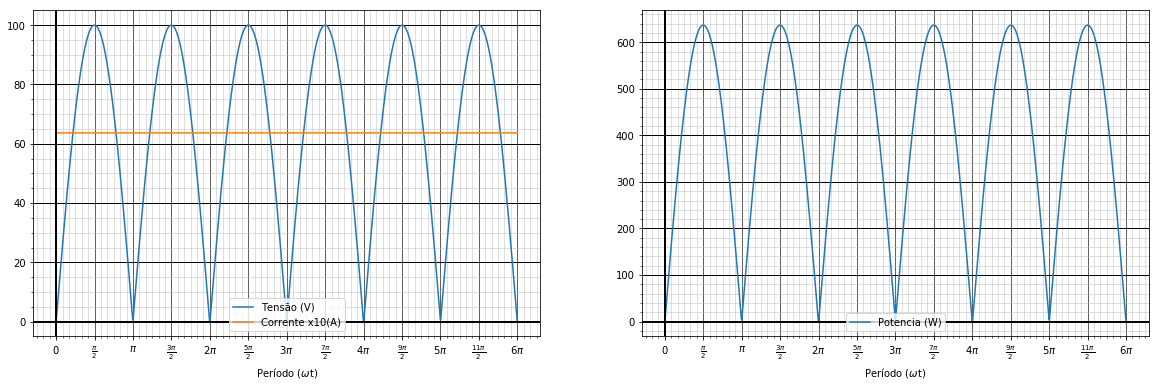

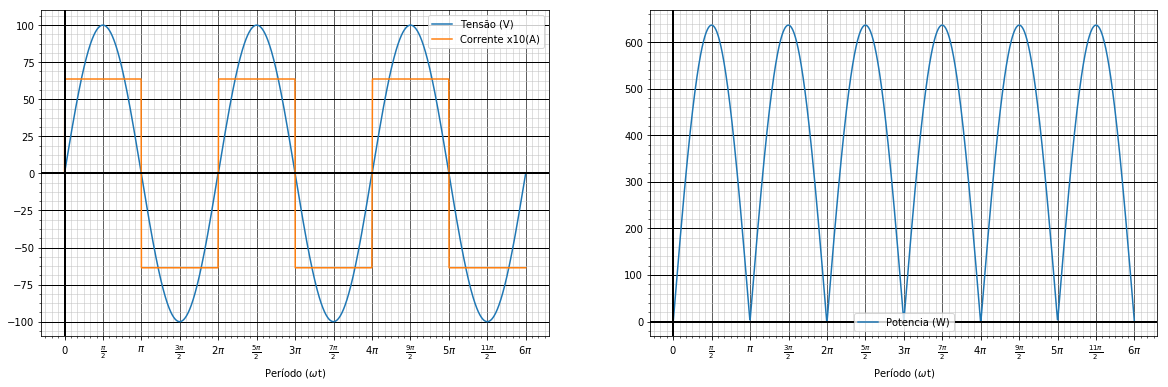

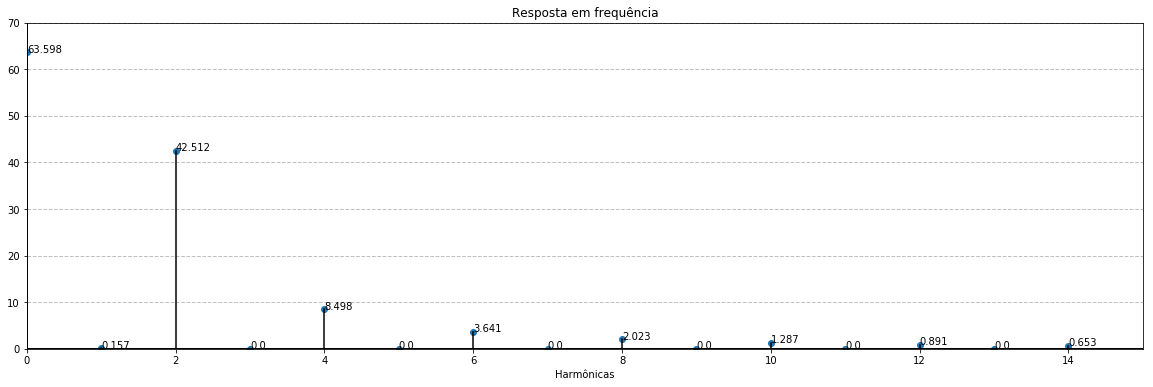

In [45]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/L ###################

V_pk = 100
Freq = 60
R = 10
L = 0.01
T = 2*pi

w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
#(r, phi) = polar(z)
tal = L/R

a = 0
b = pi

func_vin = f'{V_pk}*sin(x)'
func_vout = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - 2*heaviside(x - {b}, 0) + {eps} )'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

vh = calculo_harmonicas(func_vin, T, n_harmonicas = 15)
XLR2 = abs( complex(R, 2*w*L) )
delta_i = 2*(vh/XLR2)

Iout_media = Vout_media/R
func_iout = f'({Iout_media} + {eps}*x)'
#Iout_rms = sqrt( Iout_media**2 + (delta_i/(2*sqrt(2)))**2 )
I_pk = Iout_media

func_iin = func_iout + f'*( heaviside(x - {a}, 0) - 2*heaviside(x - {b}, 0) + {eps} )'
Iin_rms = Iout_rms 
#Iin_rms = calculo_rms(func_iin)

func_p = '(' + func_vin + ')*(' + func_iin + ')'
P = (Iin_rms**2)*R 
#P = calculo_medio(func_p)
S = Iin_rms*(V_pk/sqrt(2))
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Parametros - #"        , "\ndelt I:\t"  , delta_i)
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vin, func_iin, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_vout, ax2, T=2*np.pi, n_harmonicas = 15)